# Modeling Player Data to Predict Rating
## Regression (OLS, Ridge, Lasso) 

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

sns.set(style='whitegrid')

np.random.seed(42)

In [39]:
player_cleaned_df = pd.read_csv('../data/cleaned/player_attributes_cleaned.csv')
#player_cleaned_df.set_index(['player_api_id', 'player_name', 'birthday', 'height', 'weight', 'date'], inplace=True)
player_cleaned_df

,player_api_id,player_name,birthday,height,weight,date,overall_rating,potential,preferred_foot,attacking_work_rate,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,2625,"Patryk Rachwal,18",1981-01-27,175.26,154,2015-01-16,61.0,61.0,1.0,1.0,...,55.0,66.0,62.0,63.0,54.0,12.0,11.0,6.0,8.0,8.0
1,2625,"Patryk Rachwal,18",1981-01-27,175.26,154,2014-11-07,61.0,61.0,1.0,1.0,...,55.0,66.0,62.0,63.0,54.0,12.0,11.0,6.0,8.0,8.0
2,2625,"Patryk Rachwal,18",1981-01-27,175.26,154,2014-09-18,61.0,61.0,1.0,1.0,...,55.0,66.0,62.0,63.0,54.0,12.0,11.0,6.0,8.0,8.0
3,2625,"Patryk Rachwal,18",1981-01-27,175.26,154,2013-06-07,61.0,61.0,1.0,1.0,...,55.0,66.0,62.0,63.0,54.0,12.0,11.0,6.0,8.0,8.0
4,2625,"Patryk Rachwal,18",1981-01-27,175.26,154,2013-03-08,61.0,61.0,1.0,1.0,...,55.0,66.0,62.0,63.0,54.0,12.0,11.0,6.0,8.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177032,750435,Rees Greenwood,1996-01-20,172.72,150,2015-02-06,56.0,70.0,1.0,1.0,...,58.0,61.0,18.0,19.0,21.0,9.0,10.0,8.0,10.0,11.0
177033,750435,Rees Greenwood,1996-01-20,172.72,150,2015-01-16,56.0,70.0,1.0,1.0,...,58.0,61.0,18.0,19.0,21.0,9.0,10.0,8.0,10.0,11.0
177034,750435,Rees Greenwood,1996-01-20,172.72,150,2007-02-22,56.0,70.0,1.0,1.0,...,58.0,61.0,18.0,19.0,21.0,9.0,10.0,8.0,10.0,11.0
177035,750584,Alexandre Azevedo,1997-01-28,175.26,150,2016-05-19,58.0,66.0,1.0,1.0,...,47.0,52.0,56.0,66.0,62.0,8.0,9.0,13.0,11.0,13.0


In [40]:
X = player_cleaned_df.select_dtypes(include=['int64', 'float64']).drop(columns=['overall_rating', 'player_api_id'])
y = player_cleaned_df['overall_rating']
ols = LinearRegression().fit(X, y)
y_ols = ols.predict(X)
print("OLS Coefs:", ols.coef_)
print("OLS R^2:", r2_score(y, y_ols))

def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

total_loss = mse_loss(y, y_ols)
print("Total MSE Loss:", total_loss)


OLS Coefs: [-5.33918967e-02  4.68216239e-03  3.82129326e-01  9.30515749e-03
 -2.54807255e-01 -1.03515094e-01  2.19153205e-02  1.20887015e-02
  7.36562312e-02  4.80273162e-02  4.32484958e-03 -1.34350374e-02
  1.18153022e-02  1.18993588e-02  7.72433136e-03  1.33245161e-01
  4.50828534e-03  1.16795847e-02 -1.08216690e-02  2.11518274e-01
  3.63386226e-05  1.63194980e-02  1.40949151e-02 -2.23675817e-03
  6.69075639e-02 -1.31624139e-02  1.95121397e-02  1.15638328e-02
 -1.04168962e-02 -1.37965356e-03  1.39561039e-02  3.09096385e-02
  2.80194586e-03 -2.63139859e-02  1.62098318e-01  3.43624379e-02
 -3.56424189e-02  5.68663922e-02  2.76747939e-02]
OLS R^2: 0.8436100951586
Total MSE Loss: 7.739812650472661


In [41]:
X

,height,weight,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,175.26,154,61.0,1.0,1.0,1.0,50.0,47.0,46.0,52.0,...,55.0,66.0,62.0,63.0,54.0,12.0,11.0,6.0,8.0,8.0
1,175.26,154,61.0,1.0,1.0,1.0,50.0,47.0,46.0,52.0,...,55.0,66.0,62.0,63.0,54.0,12.0,11.0,6.0,8.0,8.0
2,175.26,154,61.0,1.0,1.0,1.0,50.0,47.0,46.0,52.0,...,55.0,66.0,62.0,63.0,54.0,12.0,11.0,6.0,8.0,8.0
3,175.26,154,61.0,1.0,1.0,1.0,50.0,47.0,46.0,52.0,...,55.0,66.0,62.0,63.0,54.0,12.0,11.0,6.0,8.0,8.0
4,175.26,154,61.0,1.0,1.0,1.0,50.0,47.0,46.0,52.0,...,55.0,66.0,62.0,63.0,54.0,12.0,11.0,6.0,8.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177032,172.72,150,70.0,1.0,1.0,0.0,35.0,57.0,55.0,60.0,...,58.0,61.0,18.0,19.0,21.0,9.0,10.0,8.0,10.0,11.0
177033,172.72,150,70.0,1.0,1.0,0.0,35.0,57.0,55.0,60.0,...,58.0,61.0,18.0,19.0,21.0,9.0,10.0,8.0,10.0,11.0
177034,172.72,150,70.0,1.0,1.0,0.0,35.0,57.0,55.0,60.0,...,58.0,61.0,18.0,19.0,21.0,9.0,10.0,8.0,10.0,11.0
177035,175.26,150,66.0,1.0,1.0,1.0,47.0,39.0,53.0,60.0,...,47.0,52.0,56.0,66.0,62.0,8.0,9.0,13.0,11.0,13.0


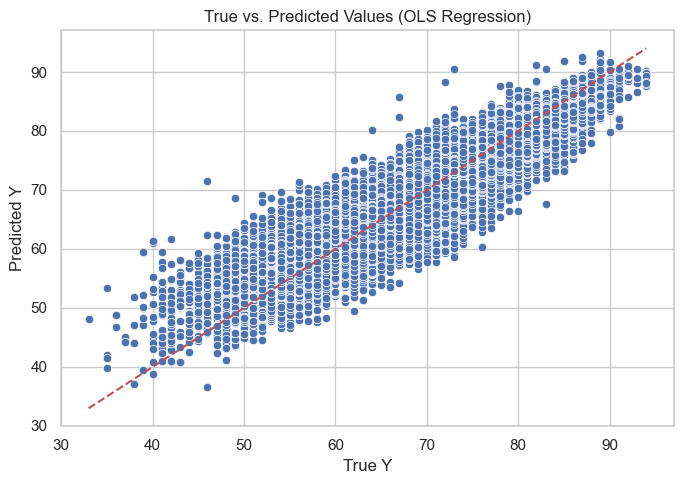

In [42]:
plt.figure(figsize=(7, 5))
sns.scatterplot(x=y, y=y_ols)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # ideal diagonal
plt.xlabel("True Y")
plt.ylabel("Predicted Y")
plt.title("True vs. Predicted Values (OLS Regression)")
plt.tight_layout()
plt.show()

In [43]:
# Fit Ridge
ridge = Ridge(alpha=1.0,solver='sparse_cg').fit(X, y)
y_ridge = ridge.predict(X)
print("Ridge Coefs:", ridge.coef_)
print("Ridge R^2:", r2_score(y, y_ridge))
print(ridge.coef_[0] / ridge.coef_[1])

Ridge Coefs: [-5.31259704e-02  4.68330358e-03  3.82058849e-01  7.26114422e-03
 -2.53910835e-01 -1.05210634e-01  2.18694840e-02  1.20755798e-02
  7.36326717e-02  4.81706728e-02  4.31303453e-03 -1.33454439e-02
  1.18223717e-02  1.18680291e-02  7.57879702e-03  1.33268675e-01
  4.62138606e-03  1.15625019e-02 -1.08026513e-02  2.11472996e-01
  6.93026421e-05  1.63185981e-02  1.41385583e-02 -2.27894335e-03
  6.68139754e-02 -1.31927175e-02  1.96018209e-02  1.16237384e-02
 -1.03287788e-02 -1.42777886e-03  1.39572635e-02  3.08788838e-02
  2.83606770e-03 -2.63174424e-02  1.62489802e-01  3.39631270e-02
 -3.55593379e-02  5.71427096e-02  2.74090197e-02]
Ridge R^2: 0.8436098702368543
-11.343695625969046


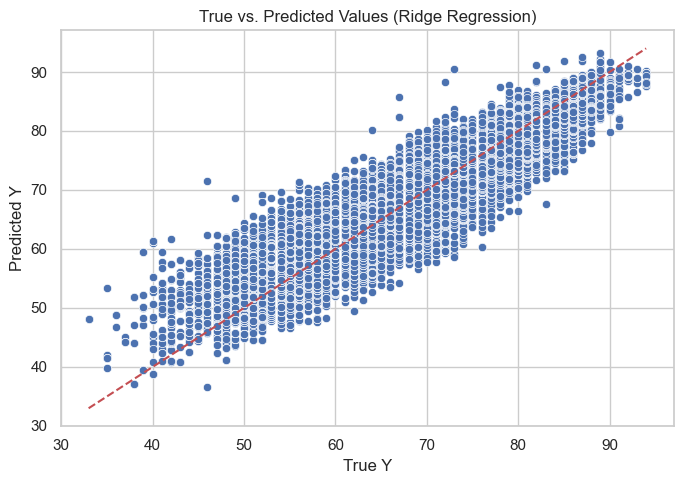

In [44]:
plt.figure(figsize=(7, 5))
sns.scatterplot(x=y, y=y_ridge)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # ideal diagonal
plt.xlabel("True Y")
plt.ylabel("Predicted Y")
plt.title("True vs. Predicted Values (Ridge Regression)")
plt.tight_layout()
plt.show()

In [45]:
# Fit Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X, y)
y_pred = lasso.predict(X)
print("Lasso R^2:", r2_score(y, y_pred))
print("Nonzero Coefficients:", np.sum(lasso.coef_ != 0))

Lasso R^2: 0.8431611776757586
Nonzero Coefficients: 33


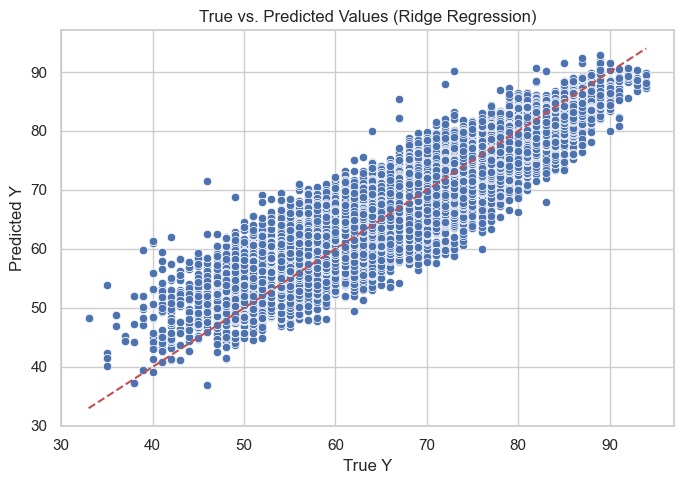

In [46]:
plt.figure(figsize=(7, 5))
sns.scatterplot(x=y, y=y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # ideal diagonal
plt.xlabel("True Y")
plt.ylabel("Predicted Y")
plt.title("True vs. Predicted Values (Ridge Regression)")
plt.tight_layout()
plt.show()